# Wavelength Analysis with Four Filters (2018-06-01)

Experiment description: For the second half of 2018-06-01 UT, we observed FLD2 with a four filter setup in order to get simeltaneous data at different wavelengths.  This removes the varying conditions between different frames in our wavelength dependence tests from RUN3 (May-2017).

Frames with 30 second exposure times alternated between AO-off and AO-on in order to minimize the differences in conditions between the two data sets.  Every two frames, the focus would cycle between -3.5 and -2.0, as the optical path through different filters has different focal lengths. 

After standard calibrations and reduction, images were split into quadrants of each filter.  In each frame, metrics for all stars in a given filter are median combined to give a single data point per filter per frame.

As of now, no correction has been made for spatial variability of the field.

In [ ]:
from imaka.analysis import fourfilt
%matplotlib inline

files_c = ["stats_closed_B_mdp.fits", "stats_closed_V_mdp.fits", "stats_closed_R_mdp.fits", "stats_closed_I_mdp.fits"]
files_o = ["stats_open_B_mdp.fits", "stats_open_V_mdp.fits", "stats_open_R_mdp.fits", "stats_open_I_mdp.fits"]

## Focus Comparison

Four filter data was taken alternating between focus values of -3.5 and -2.0.  The figures below compare the data sets of each filter at the different focus.  Ostensibly, the focus value of -3.5 is meant only for B-band (blue in figures), while all others (RVI) should be at -2.0.  However, in AO-off, all filters produce lower FWHM with a focus of -3.5 rather than -2.0. The only case in which -2.0 is better is for I-band in AO-on.  As of now, all the subsequent figures are using the nominally better filter (-3.5 for B, -2.0 for VRI), but maybe this should be changed.

Far left: median FWHM for B, V, R, and I filters (blue, green, red and purple points, respectively) in AO-off and AO-on (top, bottom). Each set of three data points shows the median with a focus of -3.5 ('+'), -2.0 ('x') and both sets combined ('*').

Right: Distributions comprising each of the '+' and 'x' data points. The median value of each CDF is designated with a vertical line.

All FWHM values are measured along the minor axis of a Moffat profile.

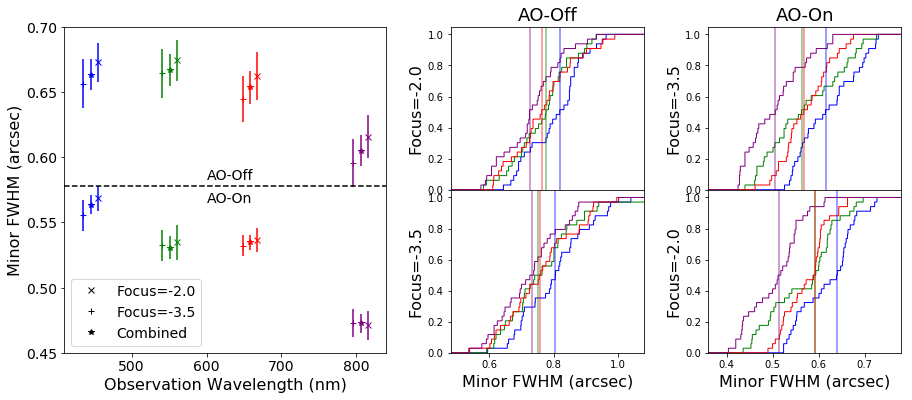

In [2]:
fourfilt.focus_comp(files_o, files_c)

# Correction Factor

Near-simeltaneous AO-off and AO-on data in each filter shows the variation in amount of correction with changing wavelength. 


Left: Performance for AO-off (blue) and AO-on (red), showing minor FWHM (circles) and major FWHM (squares) at each observation band.

Right: Ratio of AO-off to AO-on FWHM for each filter, shown both for minor (circles) and major (squares) axes.

At longer wavelengths, image quality improves in AO-on and AO-off cases individually, as well as the factor by which the AO system corrected images.  This difference is more prominent along the major FWHM axis. 

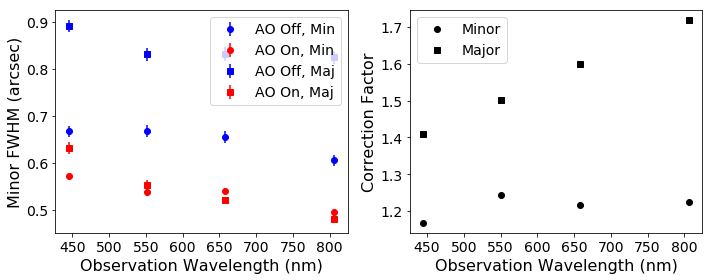

In [3]:
fourfilt.plot_gain(files_o, files_c)

# Stability

Data points show distributions of minor FWHM (horizontal line at median, shaded box at 2nd and 3rd quartile, extended lines showing full range) for AO-off (blue) and AO-on (red) data at each observation band. There is consistently less spread in AO-on than in AO-off for between all frames in a night at all bands. Note: all data has been included with no outlier rejection; 'whiskers' of plot can be sensitive to outliers.

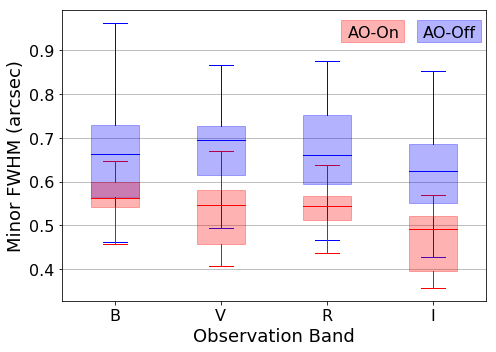

In [3]:
fourfilt.plot_stability(files_o, files_c)

# PSF Shape

Left: Distributions of FWHM for each filter. Each panel show AO-off (blue) and AO-on (red) FWHM along minor axis (solid line) and major axis (dashed line).  Median values of each distribution are designated with a matching vertical line.

Right: Distribution of elongation ($\frac{major \: FWHM}{minor \: FWHM}$) for each filter. Same labeling scheme as left.

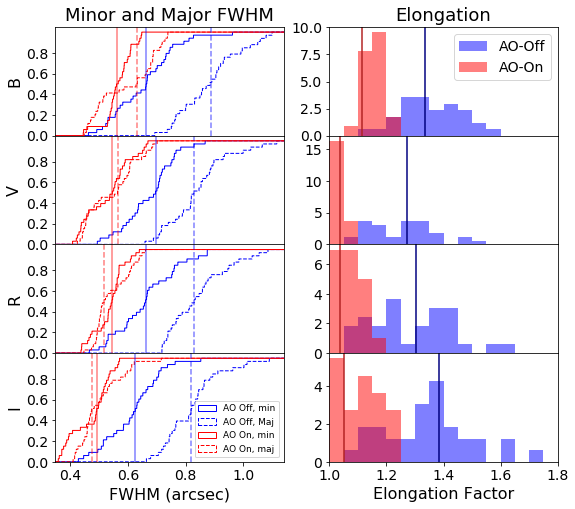

In [2]:
fourfilt.minmaj_FWHM(files_o, files_c)

# Wavelength Dependence Model

GLAO correction is expected to be a function of wavelength. The figure below shows median minor FWHM at variuos wavelengths for AO-off (blue) and AO-on (red) data.  The data have been fit to a power-law model of the form:

$$f(x)=A(\frac{x}{x_o})^{-\alpha}$$

With $A$, $x_o$, and $\alpha$ as free parameters

Each data set is shown in circle points with errorbars, with the best fit model (weighted with uncertainties) in solid lines. The corresponding $\alpha$ and $\chi^2$ are shown in the same color as the matching data set. In this case, the chi squared is the same as the reduced chi squared (4 data points - 3 free parameters = 1 degree of freedom).

Both cases (but even more so for closed-loop) demonstrate a moderately good fit close to a 1/5 power law.

Questions: If major axis improvement is largely due to correction of jitter, how impactful do we expect varying wavelengths to be in the amount of correction? Only minor axis has been examined here.

/Users/fatimaabdurrahman/anaconda/lib/python3.6/site-packages/astropy/modeling/powerlaws.py:53: RuntimeWarning: invalid value encountered in power
  return amplitude * xx ** (-alpha)


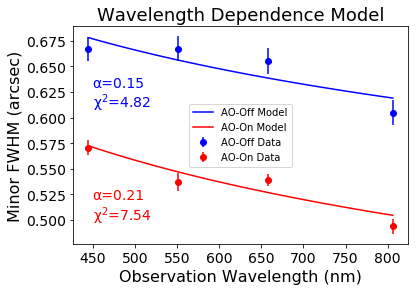

In [2]:
fourfilt.power_model(files_o, files_c)